In [ ]:
!pip install memo-lang

import jax
import jax.numpy as np
from memo import memo
import itertools
import matplotlib.pyplot as plt



In [ ]:
#ONE SIDED SECRETARY PROBLEM HARD CODED WITH N/E REJECTION RATE
import jax
import jax.numpy as jnp
import itertools
import numpy as np
from memo import memo

candidates = [1,2,3,4,5] # make this variable by N in the future

orders = list(itertools.permutations(candidates)) # make all the permutations
indices = [i for i in range(len(orders))]

def find_next_best(max_val, arr):
    """
    Find the best candidate from the N - N/e that weren't rejected
    """
    mask = arr > max_val
    idx = jnp.argmax(mask)
    return jnp.where(mask.any(), arr[idx], arr[-1])

def is_success(index):
    """
    Returns true iff the permutation chosen will lead to the recruiter
    choosing the best candidate under the optimal solution
    """
    permutation = jnp.array(orders)[index]
    num_candidates = len(candidates)

    cutoff = int(num_candidates // np.e)
    rejected = permutation[:cutoff]
    leftovers = permutation[cutoff:]

    rejected_maximum = jnp.max(rejected)
    global_maximum = jnp.max(permutation)

    next_best = find_next_best(rejected_maximum, leftovers)

    return next_best == global_maximum


@memo
def one_sided_secretary[i: indices]():
  """
  Alice chooses a permutation of ordering of the candidates
  Then we check to see if that permutation would get us the
  best candidate
  """
  alice: chooses(i in indices, wpp=1)
  return E[is_success(alice.i)==True]

print(one_sided_secretary()[(indices,)])


[0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675
 0.41666675 0.41666675 0.41666675 0.41666675 0.41666675 0.4166

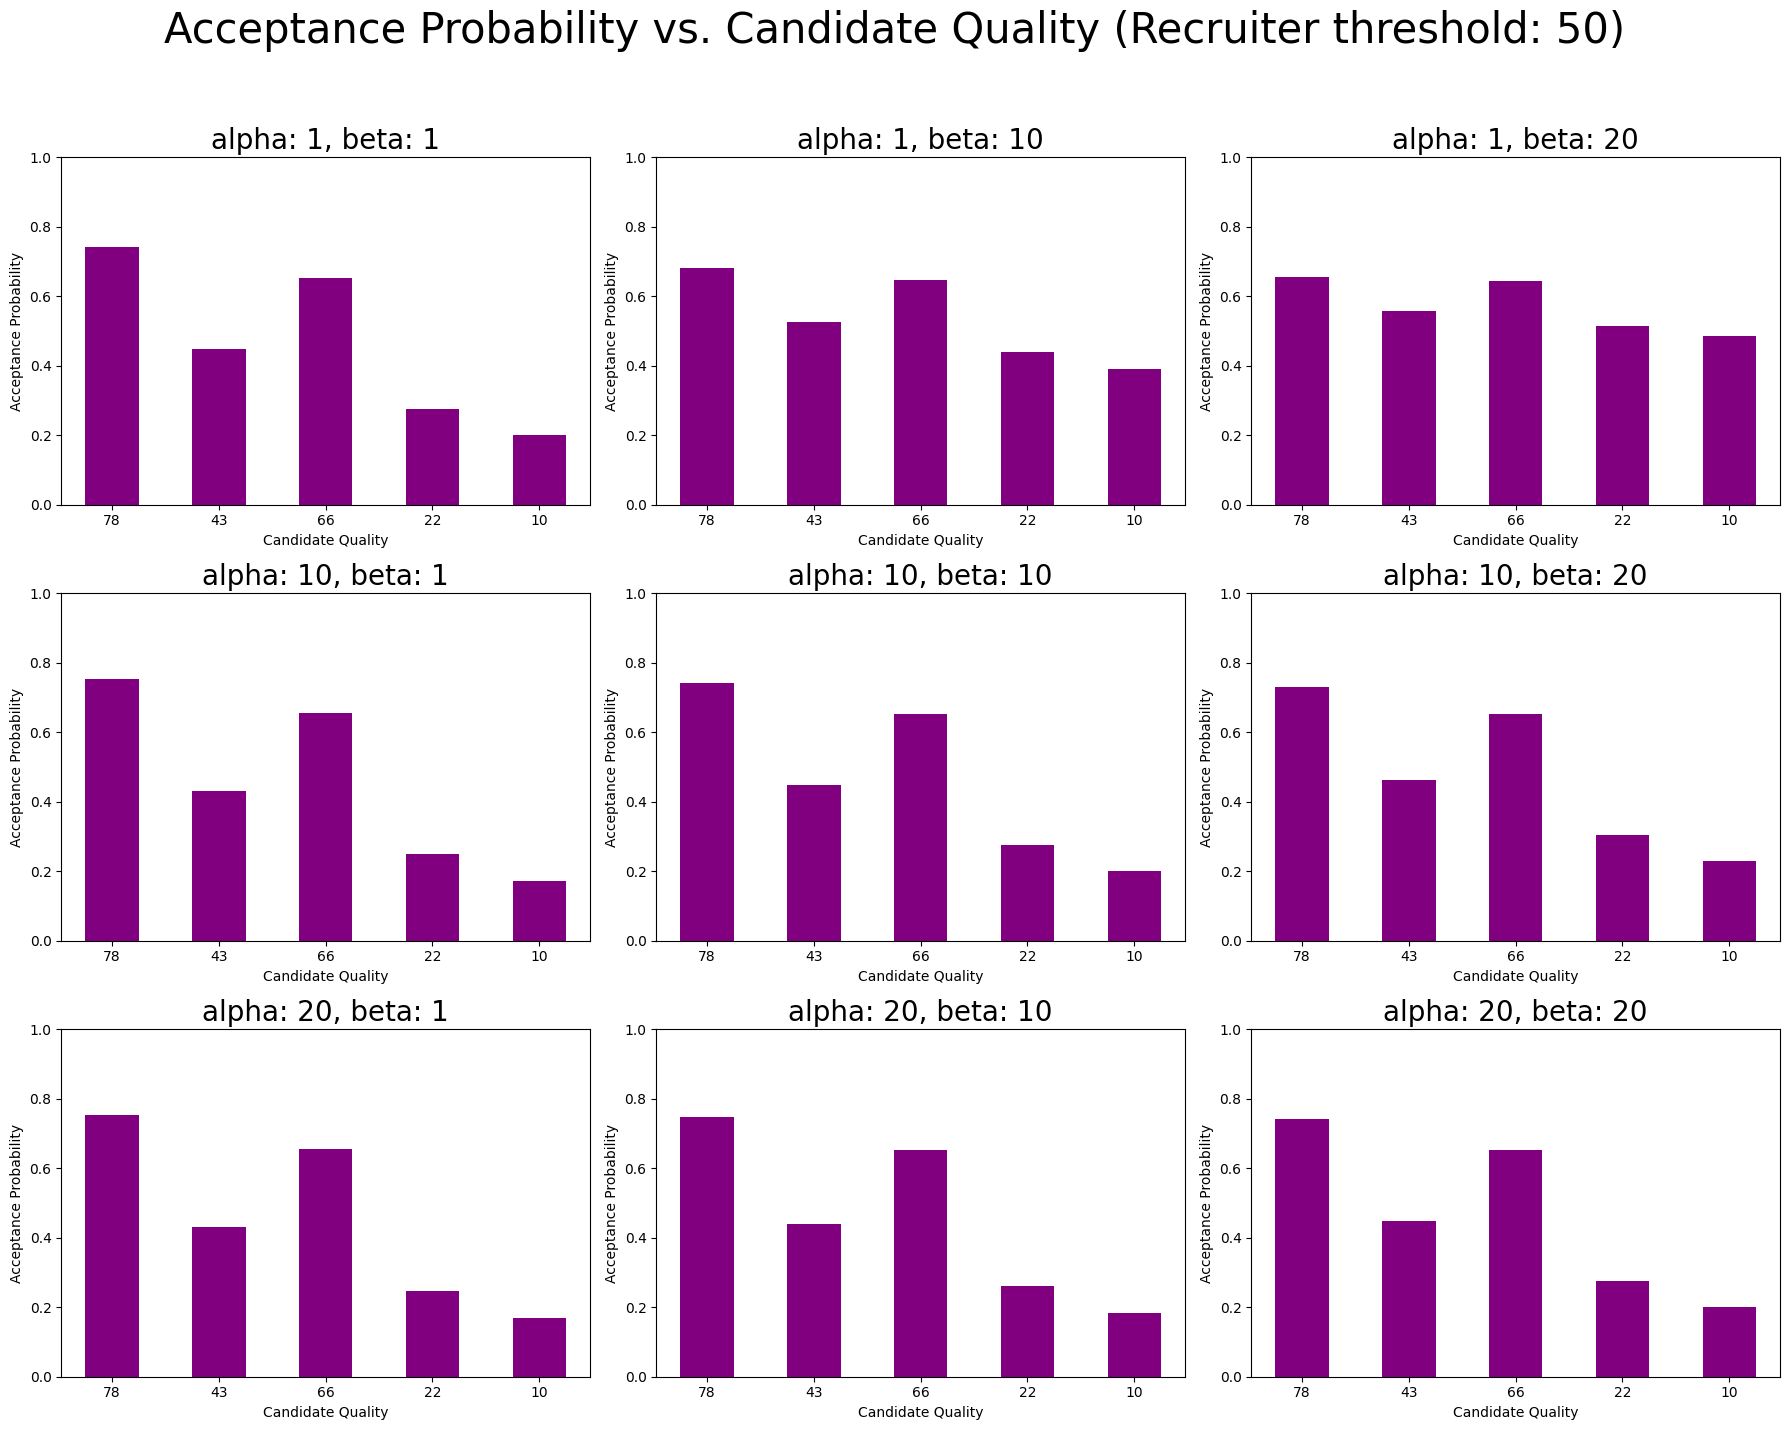

In [ ]:
#ONE SIDED SECRETARY PROBLEM W/ HUMAN DECISION-MAKING

# candidates = [10,20,40,60,80,100] #candidates quality
candidates = [78,43,66,22,10] #candidates quality
# candidates = [100,20,40,60,80] #candidates quality
thresh = 50 # recruiter acceptance threshold
choices = [0,1] # either don't offer a job or do

def one_sided_secretary_hyper(cands, rec_thresh, alphas,betas):
  """
  Run human version of this problem while sweeping over alpha and beta to find
  most realistic parameters
  """
  @memo
  def memo_func[c:choices](thresh, candidate, cand_num,alpha,beta):
    alice: chooses(c in choices, wpp=exp(c*(alpha*(candidate-thresh)+beta*(cand_num+1))/(.5*(alpha*50+beta*5))))
    return E[alice.c==c]

  results ={}
  for alpha in alphas:
    for beta in betas:
      vals =[]
      for can in candidates:
        cand_num = candidates.index(can)/len(candidates)
        vals.append((memo_func(thresh, can,cand_num,alpha,beta).tolist()[1]).real)
      results[alpha,beta] = vals
  return results

final_dict = one_sided_secretary_hyper(candidates,thresh,[1,10,20],[1,10,20])


#visualize on nine subplots
alphas = sorted(list(set([k[0] for k in final_dict.keys()])))
betas = sorted(list(set([k[1] for k in final_dict.keys()])))

fig, axes = plt.subplots(len(alphas), len(betas), figsize=(18, 15))
fig.suptitle(
    f'Acceptance Probability vs. Candidate Quality (Recruiter threshold: {thresh})',
    fontsize=30
)

# define bin positions
x = np.arange(len(candidates))

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        ax = axes[i, j]
        vals = final_dict[(alpha, beta)]
        ax.bar(x,vals,width=.5,align='center',color='purple')
        ax.set_ylim(0, 1)
        ax.set_xticks(x)
        ax.set_xticklabels(candidates)
        ax.set_title(f'alpha: {alpha}, beta: {beta}',fontsize=20)
        ax.set_xlabel('Candidate Quality')
        ax.set_ylabel('Acceptance Probability')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

Beta 1 represents human behavior best because very unlikely.

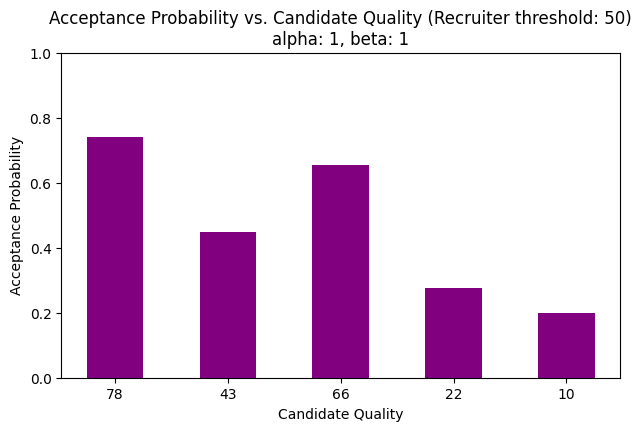

In [ ]:
#ONE SIDED SEC WITH BEST HYPERPARAMS
candidates = [78,43,66,22,10] #candidates quality

def one_sided_secretary(cands, rec_thresh, alphas,betas):
  @memo
  def memo_func[c:choices](thresh, candidate, cand_num,alpha,beta):
    alice: chooses(c in choices, wpp=exp(c*(alpha*(candidate-thresh)+beta*(cand_num+1))/(.5*(alpha*50+beta*5))))
    return E[alice.c==c]

  vals =[]
  for can in candidates:
    cand_num = candidates.index(can)/len(candidates)
    vals.append((memo_func(thresh, can,cand_num,alphas,betas).tolist()[1]).real)
  return vals

one_sec_results = one_sided_secretary(candidates,thresh,1,1)
fix,ax = plt.subplots()
x = np.arange(len(candidates))
ax.bar(x,one_sec_results,width=.5,align='center',color='purple')

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(candidates)
ax.set_title(f'Acceptance Probability vs. Candidate Quality (Recruiter threshold: {thresh})\nalpha: {1}, beta: {1}')
ax.set_xlabel('Candidate Quality')
ax.set_ylabel('Acceptance Probability')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

In [ ]:
def success(candidates,prob_selection):
  """
  returns true iff the recruiter chooses the best candidate
  This happens if we don't choose the first k
  candidates: (1-P(0))*...*(1-P(k-1)) and then choose
  candidate k: *(1-P(k))
  """
  best=max(candidates)
  best_num = candidates.index(best)
  j = 1
  for prob in prob_selection[:best_num]:
    j*=(1-prob.real)
  return j*prob_selection[best_num].real

print(success(candidates,one_sec_results))

0.7416467666625977


In [ ]:
#IS HUMAN OPTIMAL
candidates = [78,43,66,22,10] #candidates quality
orders = list(itertools.permutations(candidates)) # make all the permutations

success_rates = []
for order in orders:
  success_rates.append(success(order,one_sided_secretary(order,thresh,1,1)))

print(np.mean(success_rates))
#NO - .2 < .37

0.19426754398378304


In [ ]:
# TWO-SIDED OPTIMAL

# employer does same N/e technique as before
# now candidates also do it
# success = employer gets best candidate and best candidate happens to choose
#   employer
# candidates = [1,2,3,4,5] # make this variable by N in the future
candidates = [78,43,66,22,10]
employers = [10,20,40,50,60]
our_employer_index = 2 # we are employer with value 3

can_orders = list(itertools.permutations(candidates)) # perms of candidates
emp_orders = list(itertools.permutations(employers)) # perms of employers

can_indices = [i for i in range(len(can_orders))]
emp_indices = [i for i in range(len(emp_orders))]

def find_next_best(max_val, arr):
    mask = arr > max_val
    idx = jnp.argmax(mask)
    return jnp.where(mask.any(), arr[idx], arr[-1])



def is_success(index):
    # returns true iff employer chooses best candidate
    permutation = jnp.array(can_orders)[index]
    num_candidates = len(candidates)

    cutoff = int(num_candidates // np.e)
    rejected = permutation[:cutoff]
    leftovers = permutation[cutoff:]

    rejected_maximum = jnp.max(rejected)
    global_maximum = jnp.max(permutation)

    next_best = find_next_best(rejected_maximum, leftovers)

    return next_best == global_maximum

def can_chooses_emp(index):
  """
  returns true iff candidate chooses recruiter with same value as us
  """
  permutation = jnp.array(emp_orders)[index]
  num_employers = len(employers)

  cutoff = int(num_employers // np.e)
  rejected = permutation[:cutoff]
  leftovers = permutation[cutoff:]

  rejected_maximum = jnp.max(rejected)
  global_maximum = jnp.max(permutation)

  next_best = find_next_best(rejected_maximum, leftovers)

  return next_best == employers[our_employer_index]

# Alice chooses a permutation of ordering of the candidates
# Then we check to see if that permutation would get us the
#   best candidate (deterministic)
@memo
def two_sided_secretary_optimal[i: indices]():
  rec: chooses(i in can_indices, wpp=1)
  can: chooses(i in emp_indices, wpp=1)
  return E[is_success(rec.i)==True and can_chooses_emp(can.i)]

print(two_sided_secretary_optimal()[(indices,)])


[0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443
 0.06944443 0.06944443 0.06944443 0.06944443 0.06944443 0.0694

In [ ]:
def success_two_sided(candidates,prob_selection):
  best=max(candidates)
  best_num = candidates.index(best)
  j = 1
  for prob in prob_selection[:best_num]:
    j*=(1-prob.real)
  return j*prob_selection[best_num].real

print(success(candidates,one_sec_results))


0.00714555963003716


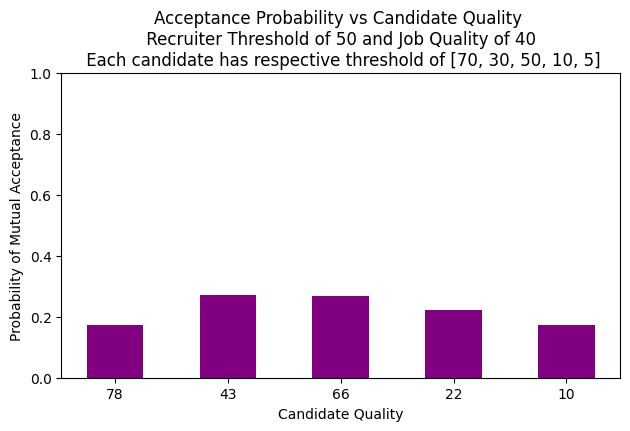

0.17253486812114716


In [ ]:
# TWO SIDED SECRETARY PROBLEM WITH HUMAN DECISION-MAKING, INDEPENDENT
"""
Only having one recruiter here for simplicity
If all the candidates are speaking with this recruiter,
we can assume that means they have rejected all the
previous recruiters
"""

# candidates_quality = [10,20,40,60,80,100]
# candidates_threshold = [30,30,30,50,60,70]

# candidates_quality = [100,10,20,40,60,80]
# candidates_threshold = [70,30,30,30,50,60]

# candidates_quality = [10,100,40,60,80]
candidates_quality   = [78,43,66,22,10]
candidates_threshold = [70,30,50,10,5]

recruiter_qual = 40
recruiter_thresh = 50
# recruiter_thresh = 75
choices = [0,1] # either don't offer a job or do

def two_sided_secretary(candidates_threshold, candidates_quality,rec_thresh,rec_quality):
  """
  The recruiter and candidates both decide to accept or reject independently
  Return true iff both sides decide to accept
  Do this for each candidate in the list
  """
  @memo
  def memo_func[c:choices](can_thresh, can_quality,rec_thresh,rec_quality,cand_num):
    rec: chooses(c1 in choices,wpp=exp(c1*((can_quality-rec_thresh)+(cand_num+1))/27))
    cand: chooses(c2 in choices,wpp=exp(c2*((rec_quality-can_thresh))/25))
    return E[rec.c1==c and cand.c2==c]

  vals = []
  for i,can in enumerate(candidates_quality):
    vals.append(memo_func(candidates_threshold[i], candidates_quality[i],rec_thresh,rec_quality,i).tolist()[1])
  return vals

#visualize
fig,ax = plt.subplots()
x = np.arange(len(candidates_quality))
ans = two_sided_secretary(candidates_threshold,candidates_quality,recruiter_thresh,recruiter_qual)
ax.bar(x,ans,width=.5,align='center',color='purple')

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(candidates_quality)
ax.set_title(f'Acceptance Probability vs Candidate Quality \n Recruiter Threshold of {recruiter_thresh} and Job Quality of {recruiter_qual} \n Each candidate has respective threshold of {candidates_threshold}')
ax.set_xlabel('Candidate Quality')
ax.set_ylabel('Probability of Mutual Acceptance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print(success_two_sided(candidates_quality, ans))

In [ ]:
# IS TWO SIDED INDEPENDENT OPTIMAL
paired = list(zip(candidates_quality, candidates_threshold))

permuted_pairs = itertools.permutations(paired)

permuted = [
    (list(q), list(t))
    for q, t in (
        zip(*p) for p in permuted_pairs
    )
]

print(permuted)
success_rates = []
for permutation in permuted:
  qualities, thresholds = permutation
  success_rates.append(success_two_sided(qualities,two_sided_secretary(thresholds,qualities,recruiter_thresh,recruiter_qual)))

print(np.mean(np.array(success_rates)))
# 0.047, makes sense because optimal is 0.069

[([10, 100, 40, 60, 80], [30, 100, 30, 50, 60]), ([10, 100, 40, 80, 60], [30, 100, 30, 60, 50]), ([10, 100, 60, 40, 80], [30, 100, 50, 30, 60]), ([10, 100, 60, 80, 40], [30, 100, 50, 60, 30]), ([10, 100, 80, 40, 60], [30, 100, 60, 30, 50]), ([10, 100, 80, 60, 40], [30, 100, 60, 50, 30]), ([10, 40, 100, 60, 80], [30, 30, 100, 50, 60]), ([10, 40, 100, 80, 60], [30, 30, 100, 60, 50]), ([10, 40, 60, 100, 80], [30, 30, 50, 100, 60]), ([10, 40, 60, 80, 100], [30, 30, 50, 60, 100]), ([10, 40, 80, 100, 60], [30, 30, 60, 100, 50]), ([10, 40, 80, 60, 100], [30, 30, 60, 50, 100]), ([10, 60, 100, 40, 80], [30, 50, 100, 30, 60]), ([10, 60, 100, 80, 40], [30, 50, 100, 60, 30]), ([10, 60, 40, 100, 80], [30, 50, 30, 100, 60]), ([10, 60, 40, 80, 100], [30, 50, 30, 60, 100]), ([10, 60, 80, 100, 40], [30, 50, 60, 100, 30]), ([10, 60, 80, 40, 100], [30, 50, 60, 30, 100]), ([10, 80, 100, 40, 60], [30, 60, 100, 30, 50]), ([10, 80, 100, 60, 40], [30, 60, 100, 50, 30]), ([10, 80, 40, 100, 60], [30, 60, 30, 10

0.047255933


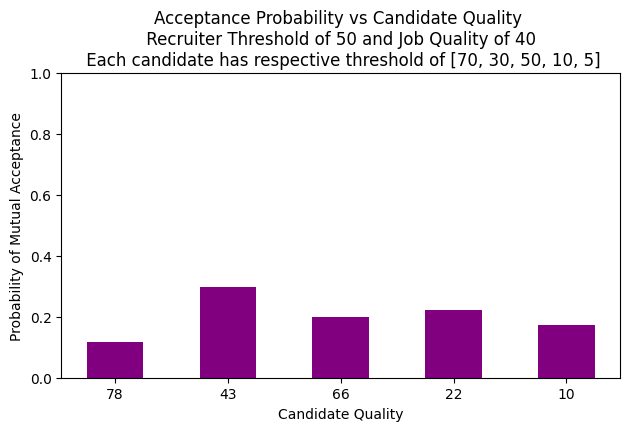

0.11573760211467743


In [ ]:
#TWO SIDED SECRETARY PROBLEM WITH HUMAN DECISION-MAKING, INTERTWINED

# candidates_quality = [10,20,40,60,80,100]
# candidates_threshold = [30,30,30,50,60,70]

# candidates_quality = [100,10,20,40,60,80]
# candidates_threshold = [70,30,30,30,50,60]

# candidates_quality = [10,100,40,60,80]
# candidates_threshold = [30,100,30,50,60]
candidates_quality   = [78,43,66,22,10]
candidates_threshold = [70,30,50,10,5]

recruiter_qual = 40
recruiter_thresh = 50
choices = [0,1] # either don't offer a job or do

def two_sided_secretary_intertwined(candidates_threshold, candidates_quality,rec_thresh,rec_quality):
  """
  The recruiter now makes his choice knowing that higher quality candidates
  are likely to desire higher quality employeers
  Candidates choose the same way as before
  """
  @memo
  def memo_func[c:choices](can_thresh, can_quality,rec_thresh,rec_quality,cand_num):
    # cast: [rec, cand, other_cand]
    rec: thinks[
        other_cand: chooses(c3 in choices, wpp=exp(c3*(rec_quality - can_quality)))
    ]
    rec: chooses(c1 in choices,wpp=exp(c1*E[other_cand.c3 == c1]*((can_quality-rec_thresh)+(cand_num+1))/27))
    cand: chooses(c2 in choices,wpp=exp(c2*((rec_quality-can_thresh))/25))
    return E[rec.c1==c and cand.c2==c]

  vals = []
  for i,can in enumerate(candidates_quality):
    vals.append(memo_func(candidates_threshold[i], candidates_quality[i],rec_thresh,rec_quality,i).tolist()[1])
  return vals

#visualize
fig,ax = plt.subplots()
x = np.arange(len(candidates_quality))
ans = two_sided_secretary_intertwined(candidates_threshold,candidates_quality,recruiter_thresh,recruiter_qual)
ax.bar(x,ans,width=.5,align='center',color='purple')

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(candidates_quality)
ax.set_title(f'Acceptance Probability vs Candidate Quality \n Recruiter Threshold of {recruiter_thresh} and Job Quality of {recruiter_qual} \n Each candidate has respective threshold of {candidates_threshold}')
ax.set_xlabel('Candidate Quality')
ax.set_ylabel('Probability of Mutual Acceptance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Think this output makes sense since it makes the probability of choosing the
#   40 or 60 candidates much higher (represents employer being more realistic)
#   about who they think would actually accept their job
print(success_two_sided(candidates_quality, ans))


In [ ]:
# IS TWO SIDED INTERTWINED OPTIMAL
paired = list(zip(candidates_quality, candidates_threshold))

permuted_pairs = itertools.permutations(paired)

permuted = [
    (list(q), list(t))
    for q, t in (
        zip(*p) for p in permuted_pairs
    )
]

print(permuted)
success_rates = []
for permutation in permuted:
  qualities, thresholds = permutation
  success_rates.append(success_two_sided(qualities,two_sided_secretary_intertwined(thresholds,qualities,recruiter_thresh,recruiter_qual)))

print(np.mean(np.array(success_rates)))
# 0.03, makes sense because independent is 0.047, and we would expect lower
#   likelihood of getting max since employer might reject them for being too good

[([10, 100, 40, 60, 80], [30, 100, 30, 50, 60]), ([10, 100, 40, 80, 60], [30, 100, 30, 60, 50]), ([10, 100, 60, 40, 80], [30, 100, 50, 30, 60]), ([10, 100, 60, 80, 40], [30, 100, 50, 60, 30]), ([10, 100, 80, 40, 60], [30, 100, 60, 30, 50]), ([10, 100, 80, 60, 40], [30, 100, 60, 50, 30]), ([10, 40, 100, 60, 80], [30, 30, 100, 50, 60]), ([10, 40, 100, 80, 60], [30, 30, 100, 60, 50]), ([10, 40, 60, 100, 80], [30, 30, 50, 100, 60]), ([10, 40, 60, 80, 100], [30, 30, 50, 60, 100]), ([10, 40, 80, 100, 60], [30, 30, 60, 100, 50]), ([10, 40, 80, 60, 100], [30, 30, 60, 50, 100]), ([10, 60, 100, 40, 80], [30, 50, 100, 30, 60]), ([10, 60, 100, 80, 40], [30, 50, 100, 60, 30]), ([10, 60, 40, 100, 80], [30, 50, 30, 100, 60]), ([10, 60, 40, 80, 100], [30, 50, 30, 60, 100]), ([10, 60, 80, 100, 40], [30, 50, 60, 100, 30]), ([10, 60, 80, 40, 100], [30, 50, 60, 30, 100]), ([10, 80, 100, 40, 60], [30, 60, 100, 30, 50]), ([10, 80, 100, 60, 40], [30, 60, 100, 50, 30]), ([10, 80, 40, 100, 60], [30, 60, 30, 10

0.030477773


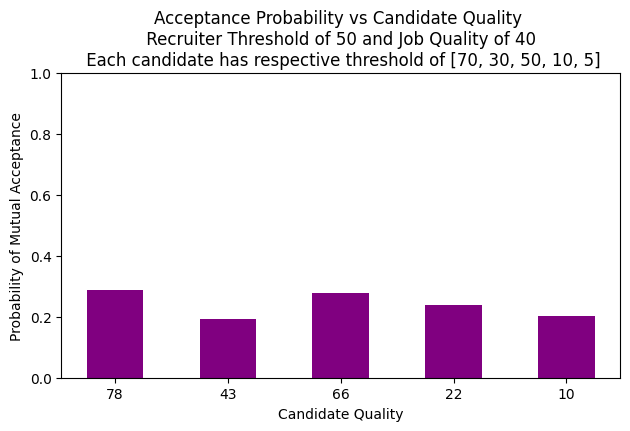

In [ ]:
#COMPATIBILITY-BASED TWO SIDED SECRETARY PROBLEM WITH HUMAN DECISION-MAKING
# candidates_quality = [0,40,60,80,100]
# candidates_threshold = [30,30,50,50,50]
candidates_quality   = [78,43,66,22,10]
candidates_threshold = [70,30,50,10,5]
recruiter_qual = 40
recruiter_thresh = 50
# recruiter_thresh = 75
rec_alignment = [30,50,60,70,80] #what the candidate thinks about the recruiter
# cand_alignment =  [30,40,50,60,80]#what the recruiter thinks about the candidate
cand_alignment =  [80,60,50,40,30]#what the recruiter thinks about the candidate
rec_align_thresh = 50
cand_align_thresh = [24,87,56,60,54,91]

choices = [0,1] # either don't offer a job or do

def two_sided_secretary_compatibility(candidates_threshold, candidates_quality,rec_thresh,rec_quality,
                                      cand_align,rec_align, cand_align_thresh, rec_align_thresh):
  """
  Now both sides allow their compatibility (value alignment) to influence their
  decision
  """

  @memo
  def memo_func[c:choices](can_thresh, can_quality,rec_thresh,rec_quality,
                           can_align, can_align_thresh, rec_align, rec_align_thresh, cand_num):
    # cast: [rec, cand, other_cand]
    rec: thinks[
        other_cand: chooses(c3 in choices, wpp=exp(c3*(rec_quality - can_quality + can_align)))
    ]
    rec: chooses(c1 in choices,wpp=exp(c1*E[other_cand.c3 == c1]*((can_quality-rec_thresh)+(can_align-rec_align_thresh)+(cand_num+1))/53))
    cand: chooses(c2 in choices,wpp=exp(c2*((rec_quality-can_thresh)+(rec_align-can_align_thresh))/50))
    return E[rec.c1==c and cand.c2==c]

  vals = []
  for i,can in enumerate(candidates_quality):
    vals.append(memo_func(candidates_threshold[i], candidates_quality[i],rec_thresh,rec_quality,
                          cand_align[i], cand_align_thresh[i], rec_align[i], rec_align_thresh,i).tolist()[1])
  return vals

#visualize
fig,ax = plt.subplots()
x = np.arange(len(candidates_quality))
ans = two_sided_secretary_compatibility(candidates_threshold,candidates_quality,recruiter_thresh,recruiter_qual,
                                        cand_alignment, rec_alignment, cand_align_thresh, rec_align_thresh)
ax.bar(x,ans,width=.5,align='center',color='purple')

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(candidates_quality)
ax.set_title(f'Acceptance Probability vs Candidate Quality \n Recruiter Threshold of {recruiter_thresh} and Job Quality of {recruiter_qual} \n Each candidate has respective threshold of {candidates_threshold}')
ax.set_xlabel('Candidate Quality')
ax.set_ylabel('Probability of Mutual Acceptance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()


In [ ]:
quality_weight = 0.8
compatibility_weight = 1-quality_weight
def success_two_sided_compatibility(candidates, cand_alignments, prob_selection):
  """
  Compute an overall score as a weighted sum of candidate quality and alignment
  Return the probability of skipping past all candidates who do not have the
  max overall score, and then choosing the one that does
  """
  overall_score = [quality_weight*quality + compatibility_weight*comp for quality, comp in zip(candidates, cand_alignments)]
  best = max(overall_score)
  j = 1
  for i in range(len(candidates)):
    current_overall_score = candidates[i]*quality_weight + cand_alignments[i]*compatibility_weight
    prob = prob_selection[i]
    if current_overall_score == best:
      j*=prob.real
      break
    j*=(1-prob.real)
  return j

In [ ]:
# IS TWO SIDED COMPATIBILITY OPTIMAL
paired = list(zip(candidates_quality, candidates_threshold,
                  rec_alignment, cand_alignment, cand_align_thresh))

permuted_pairs = itertools.permutations(paired)

permuted = [
    (list(a), list(b), list(c), list(d), list(e))
    for a, b, c, d, e in (
        zip(*p) for p in permuted_pairs
    )
]

print(permuted)
success_rates = []
for permutation in permuted:
  qualities, quality_thresholds, rec_alignments, cand_alignments, cand_align_threshes = permutation
  success_rates.append(success_two_sided_compatibility(qualities, cand_alignment,
                                         two_sided_secretary_compatibility(quality_thresholds,
                                         qualities, recruiter_thresh, recruiter_qual, cand_alignments,
                                         rec_alignments, cand_align_threshes, rec_align_thresh)))

print(np.mean(np.array(success_rates)))
# 0.03, makes sense because independent is 0.047, and we would expect lower
#   likelihood of getting max since employer might reject them for being too good

[([0, 40, 60, 80, 100], [30, 30, 50, 50, 50], [30, 50, 60, 70, 80], [80, 60, 50, 40, 30], [24, 87, 56, 60, 54]), ([0, 40, 60, 100, 80], [30, 30, 50, 50, 50], [30, 50, 60, 80, 70], [80, 60, 50, 30, 40], [24, 87, 56, 54, 60]), ([0, 40, 80, 60, 100], [30, 30, 50, 50, 50], [30, 50, 70, 60, 80], [80, 60, 40, 50, 30], [24, 87, 60, 56, 54]), ([0, 40, 80, 100, 60], [30, 30, 50, 50, 50], [30, 50, 70, 80, 60], [80, 60, 40, 30, 50], [24, 87, 60, 54, 56]), ([0, 40, 100, 60, 80], [30, 30, 50, 50, 50], [30, 50, 80, 60, 70], [80, 60, 30, 50, 40], [24, 87, 54, 56, 60]), ([0, 40, 100, 80, 60], [30, 30, 50, 50, 50], [30, 50, 80, 70, 60], [80, 60, 30, 40, 50], [24, 87, 54, 60, 56]), ([0, 60, 40, 80, 100], [30, 50, 30, 50, 50], [30, 60, 50, 70, 80], [80, 50, 60, 40, 30], [24, 56, 87, 60, 54]), ([0, 60, 40, 100, 80], [30, 50, 30, 50, 50], [30, 60, 50, 80, 70], [80, 50, 60, 30, 40], [24, 56, 87, 54, 60]), ([0, 60, 80, 40, 100], [30, 50, 50, 30, 50], [30, 60, 70, 50, 80], [80, 50, 40, 60, 30], [24, 56, 60, 8

0.1969483
